In [1]:
# Imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, median_absolute_error

np.random.seed(0)


In [2]:
"""
Decision Trees
Source: Week 4 Notebook
"""

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# For producing decision tree diagrams.
from graphviz import Source
from IPython.core.display import Image, display
import StringIO
import pydotplus

In [3]:
# Load train data
train_labels = pd.read_csv('../Data/final/train_labels_bin_processed.csv', sep=',', engine='python')
train_data = pd.read_csv('../Data/final/train_data_processed.csv', sep=',', engine='python')
print('Train data done')

# Load test data
test_labels = pd.read_csv('../Data/final/test_labels_bin_processed.csv', sep=',', engine='python')
test_data = pd.read_csv('../Data/final/test_data_processed.csv', sep=',', engine='python')
print('Test data done')

Train data done
Test data done


In [9]:
# Check the data
# Check the shape of the data
print("Train data shape:", train_data.shape)
print("Train label shape:", train_labels.shape)

print("Test data shape:", test_data.shape)
print("Test label shape:", test_labels.shape)

# Descriptive stats of train and target data
print(train_data.columns.values)
# print(train_data.describe())


('Train data shape:', (130000, 34))
('Train label shape:', (130000, 1))
('Test data shape:', (37854, 34))
('Test label shape:', (37854, 1))
['airconditioningtypeid' 'bathroomcnt' 'bedroomcnt'
 'buildingqualitytypeid' 'calculatedbathnbr'
 'calculatedfinishedsquarefeet' 'finishedsquarefeet12' 'fips'
 'fireplacecnt' 'fullbathcnt' 'garagecarcnt' 'garagetotalsqft'
 'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
 'poolcnt' 'poolsizesum' 'propertylandusetypeid' 'regionidcity'
 'regionidcounty' 'regionidzip' 'roomcnt' 'threequarterbathnbr' 'unitcnt'
 'yardbuildingsqft17' 'yearbuilt' 'numberofstories'
 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt' 'assessmentyear'
 'landtaxvaluedollarcnt' 'taxamount' 'taxdelinquencyflag']


In [9]:
# Classifier 1: Create and fit the Decision Trees classifier using standard parameters

# Create and fit
dt =  DecisionTreeClassifier()
print(cross_val_score(dt, train_data, train_labels))

dt.fit(train_data, train_labels)
# Print the resulting model
print(dt)

[0.52273042 0.52184248 0.52096555]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [12]:
# Predict test data
predicted = dt.predict(test_data)

print("Mean squared error:    %.4f" %mean_squared_error(test_labels, predicted))
print("Mean absolute error:   %.4f" %mean_absolute_error(test_labels, predicted))
print("Median absolute error: %.4f" %median_absolute_error(test_labels, predicted))
print("Accuracy score: %.4f" %accuracy_score(test_labels, predicted))

Mean squared error:    0.4740
Mean absolute error:   0.4740
Median absolute error: 0.0000
Accuracy score: 0.5260


Text(0.5,1,'Error vs. Predicted Error')

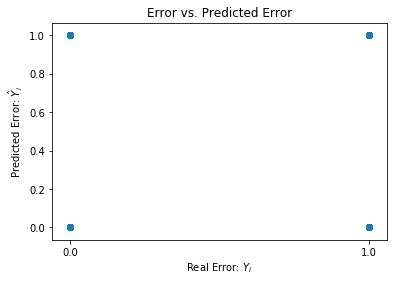

In [16]:
# Test the accuracy of the classifier

# plt.scatter(test_labels, predicted)
# plt.xlabel("Real Error: $Y_i$")
# plt.ylabel("Predicted Error: $\hat{Y}_i$")
# plt.title("Error vs. Predicted Error")
           

In [32]:
# Classifier 2: Create and fit the Decision Trees classifier while looping through the
# max_depth parameter
# Note: A depth of 6 shows the best performance
for i in range(35):
    i = i+1

    # Create and fit
    dt2 =  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i)
    print("Max depth = ", i)
    print(cross_val_score(dt2, train_data, train_labels))

    dt2.fit(train_data, train_labels)
    # Print the resulting model
    print(dt2)

    # Predict test data
    predicted2 = dt2.predict(test_data)

    print("Mean squared error:    %.4f" %mean_squared_error(test_labels, predicted2))
    print("Mean absolute error:   %.4f" %mean_absolute_error(test_labels, predicted2))
    print("Median absolute error: %.4f" %median_absolute_error(test_labels, predicted2))
    print("Accuracy score: %.4f" %accuracy_score(test_labels, predicted2))

('Max depth = ', 1)
[0.55817603 0.55816583 0.55816583]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Mean squared error:    0.4431
Mean absolute error:   0.4431
Median absolute error: 0.0000
Accuracy score: 0.5569
('Max depth = ', 2)
[0.55817603 0.55816583 0.55816583]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Mean squared error:    0.4431
Mean absolute error:   0.4431
Median absolute error: 

In [38]:
# Classifier 3: Create and fit the Decision Trees classifier while adjusting the leaf size

leaf_size = [50,60,70,80,90,100,110,120,130,140,150]

for i in leaf_size:
    
    # Create and fit
    dt3 =  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, 
                                  min_samples_leaf=i)
    print("Min Leaf = ", i)
    print(cross_val_score(dt3, train_data, train_labels))

    dt3.fit(train_data, train_labels)
    # Print the resulting model
    print(dt3)

    # Predict test data
    predicted3 = dt3.predict(test_data)

    print("Mean squared error:    %.4f" %mean_squared_error(test_labels, predicted3))
    print("Mean absolute error:   %.4f" %mean_absolute_error(test_labels, predicted3))
    print("Median absolute error: %.4f" %median_absolute_error(test_labels, predicted3))
    print("Accuracy score: %.4f" %accuracy_score(test_labels, predicted3))

('Min Leaf = ', 50)
[0.56489131 0.56460434 0.56372741]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Mean squared error:    0.4325
Mean absolute error:   0.4325
Median absolute error: 0.0000
Accuracy score: 0.5675
('Min Leaf = ', 60)
[0.56447593 0.56448896 0.56351972]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=60, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Mean squared error:    0.4321
Mean absolute error:   0.4321
Median absolute error

In [4]:
# Fit the optimal classifier and visualize the decision tree
# The best performing parameters are criterion='gini', splitter='best', max_depth=6, min_samples_leaf=70

dt4 =  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, min_samples_leaf=70)

dt4.fit(train_data, train_labels)
# Print the resulting model
print(dt4)

# Predict test data
predicted4 = dt4.predict(test_data)

print("Mean squared error:    %.4f" %mean_squared_error(test_labels, predicted4))
print("Mean absolute error:   %.4f" %mean_absolute_error(test_labels, predicted4))
print("Median absolute error: %.4f" %median_absolute_error(test_labels, predicted4))
print("Accuracy score: %.4f" %accuracy_score(test_labels, predicted4))

# Now use tree.export_graphviz and pydot to produce a visual representation, stored as dt4.png

dotfile = StringIO.StringIO()
tree.export_graphviz(dt4, out_file=dotfile)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dt4.png")


 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=70, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Mean squared error:    0.4321
Mean absolute error:   0.4321
Median absolute error: 0.0000
Accuracy score: 0.5679


True